In [1]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import BoostedWongNeuralNet
import matplotlib.pyplot as plt

In [2]:
from Boosting import Ensemble, runBoosting

In [3]:
import utils

In [4]:
cuda = torch.device('cuda:0')

In [5]:
%load_ext autoreload
%autoreload 2

## MNIST Boosting

In [6]:
maxSamples_vals = [1500]
# maxSamples_vals = [200]

In [7]:
num_wl = 2 # maybe around 100? #later: maybe change this to an array?
num_epochs = 1

In [8]:
all_val_accuracies_ensemble = []
all_train_accuracies_ensemble = []
all_train_accuracies = []
all_wl = []
all_wl_weights = []

In [ ]:
for maxSamples in maxSamples_vals:
        wl, wl_weights, train_accuracies, val_accuracies_ensemble, train_accuracies_ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.MNIST, weakLearnerType = BoostedWongNeuralNet)
        all_val_accuracies_ensemble.append(val_accuracies_ensemble)
        all_train_accuracies.append(train_accuracies)
        all_wl.append(wl)
        all_wl_weights.append(wl_weights)
        all_train_accuracies_ensemble.append(train_accuracies_ensemble)

----------------------------------------------------------------------------------------------------
Training weak learner 0
adv: False
Epoch: 0
Num samples: 200,  val accuracy: 0.2450


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:88: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img, target = self.data[index], int(self.targets[index])


Num samples: 1200,  val accuracy: 0.7250
Num samples: 1600,  val accuracy: 0.8100
Training accuracy of weak learner:  0.7927
Alpha:  1.0195094744080009
After newest WL validation score is:  0.8018750000000001
After newest WL training score is:  0.7862499999999999
----------------------------------------------------------------------------------------------------
Training weak learner 1
adv: False
Epoch: 0
Num samples: 200,  val accuracy: 0.1450
Num samples: 1200,  val accuracy: 0.6000
Num samples: 1600,  val accuracy: 0.7500


In [ ]:
legend_labels = []
for i in range(len(maxIt_vals)):
    maxIt = maxIt_vals[i]
    val_accuracies = all_val_accuracies[i]
    num_wl = len(all_wl[i])
    plt.plot(np.arange(maxIt, num_wl * maxIt + 1, maxIt), val_accuracies)
    legend_labels.append(f"MaxIt: {maxIt}")
plt.legend(legend_labels)
plt.show()
    

In [ ]:
import csv

data_dir = 'mnist_data'

for i in range(len(maxSamples_vals)):
    maxSamples = maxSamples_vals[i]
    wl = all_wl[i]
    wl_weights = all_wl_weights[i]
    val_accuracies_ensemble = all_val_accuracies_ensemble[i]
    train_accuracies_ensemble = all_train_accuracies_ensemble[i]
    train_accuracies_wl = all_train_accuracies[i]
#     val_accuracies = all_val_accuracies[i]
    wl_file = f"./results/{data_dir}/wl_maxSamples_{maxSamples}.csv"
    wl_weights_file = f"./results/{data_dir}/wl_weights_maxSamples_{maxSamples}.csv"
    wl_train_acc_file = f"./results/{data_dir}/wl_train_accuracy_{maxSamples}.csv"
    ensemble_train_acc_file = f"./results/{data_dir}/ensemble_train_accuracy_{maxSamples}.csv"
    ensemble_val_acc_file = f"./results/{data_dir}/ensemble_val_accuracy_{maxSamples}.csv"
    with open(wl_file, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(wl)
    with open(wl_weights_file, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(wl_weights)
    with open(wl_train_acc_file, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(train_accuracies_wl)
    with open(ensemble_train_acc_file, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(train_accuracies_ensemble)
    with open(ensemble_val_acc_file, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(val_accuracies_ensemble)
    

In [15]:
def generate_plots():
    from numpy import genfromtxt
    dataset_name = 'mnist'
    dataset_path = 'mnist_data'
    for i in range(len(maxSamples_vals)):
        maxSamples = maxSamples_vals[i]
        print("maxSamples:", maxSamples)
        wl_train_acc_file = f"./results/{dataset_path}/wl_train_accuracy_{maxSamples}.csv"
        ensemble_train_acc_file = f"./results/{dataset_path}/ensemble_train_accuracy_{maxSamples}.csv"
        ensemble_val_acc_file = f"./results/{dataset_path}/ensemble_val_accuracy_{maxSamples}.csv"
        
        # plot for wl train accuracies
        plt.subplots()
        wl_train_accuracies = genfromtxt(wl_train_acc_file, delimiter = ',')
        wl_range = np.arange(len(wl_train_accuracies))
        plt.plot(wl_range, wl_train_accuracies)
        plt_path = f'results/plots/{dataset_name}/wl_train_accuracies_maxSamples_{maxSamples}.png'
        plt.xlabel("Num weak learners")
        plt.ylabel("Weak learner train accuracy")
        plt.title(f"Weak learner train accuracy. Samples: {maxSamples}")
        plt.savefig(plt_path)
        
        # plot for ensemble train + val accuracies
        plt.subplots()
        train_accuracies_ensemble = genfromtxt(ensemble_train_acc_file, delimiter = ',')
#         print("wl train accuracies:", wl_train_accuracies)
#         print("train_accuracies_ensemble:", train_accuracies_ensemble)
        val_accuracies_ensemble = genfromtxt(ensemble_val_acc_file, delimiter = ',')
        wl_range = [10 * i + 1 for i in range(len(train_accuracies_ensemble))]
        plt.plot(wl_range, train_accuracies_ensemble)
        plt.plot(wl_range, val_accuracies_ensemble)
        plt.xlabel("Num weak learners")
        plt.ylabel("Accuracy")
        plt.legend(["Ensemble train accuracy", "Ensemble val accuracy"])
        plt_path = f'results/plots/{dataset_name}/wl_ensemble_accuracies_maxSamples_{maxSamples}.png'
        plt.title(f"Ensemble accuracy vs # weak learners. Samples: {maxSamples}")
        plt.savefig(plt_path)

maxSamples: 200
maxSamples: 500
maxSamples: 1000


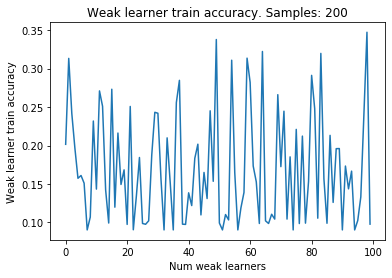

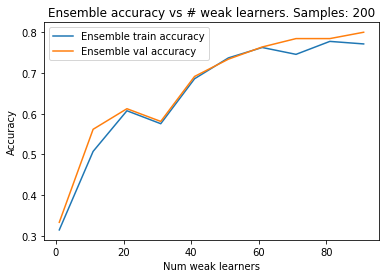

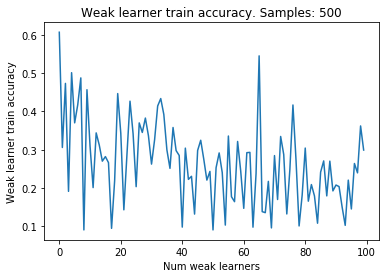

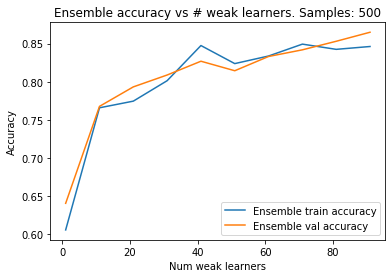

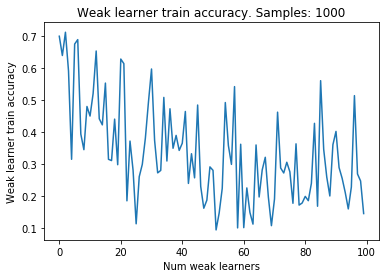

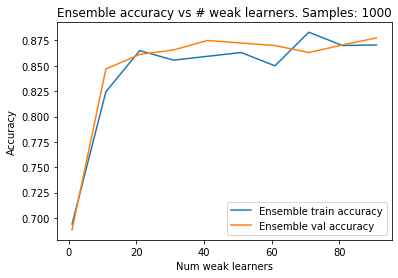

In [16]:
generate_plots()